In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics

## Generate and plot Carrier Signal
Chose Tb = 0.5 means toc do truyen 1 bit = 0.5(s)

generate and plot carrier signal 
+ co tan so f thuc te = f0*10^6 = 10MHz

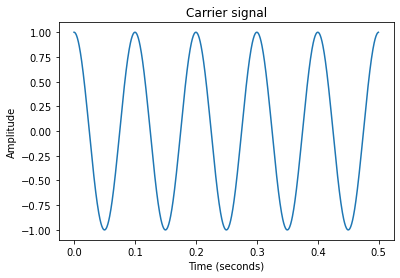

In [131]:
fs = 1000 # sample rate,  10^9 Hz (1GHz) -> plot signal
T = 0.5 # duration, seconds
t = np.linspace(0, T, int(fs), endpoint=False) # time axis
f0 = 10 # frequency,  10^7 Hz (10MHz)
carrier = np.cos(2*np.pi*f0*t)
# plt.figure(figsize=(18, 4))
plt.plot(t, carrier)
plt.title("Carrier signal")

plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


## Generate and plot Binary Data Sequence

In [132]:
def plotBinarySequence(x):
    N=len(x)
    t = np.arange(N + 1)
    y = np.zeros(N + 1)
    for i in range(N):
        if x[i] == 1:
            y[i] = 1

    y[N] = y[N-1]

    plt.step(t, y, where='post')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Value')
    plt.title('Digital Input Signal')
    plt.grid()
    plt.xlim(0, N)
    plt.ylim(-0.5, 1.5)
    plt.show()

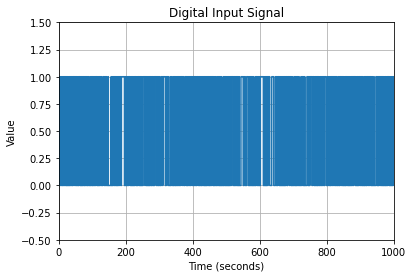

In [133]:
#input data from keyboard
# binary_sequence = input("Enter the binary data sequence: ").split()
# binary_sequence = [int(i) for i in binary_sequence]
binary_sequence = np.random.randint(2,size=1000)
N = len(binary_sequence)
plotBinarySequence(binary_sequence)


## 2-ASK Modulation

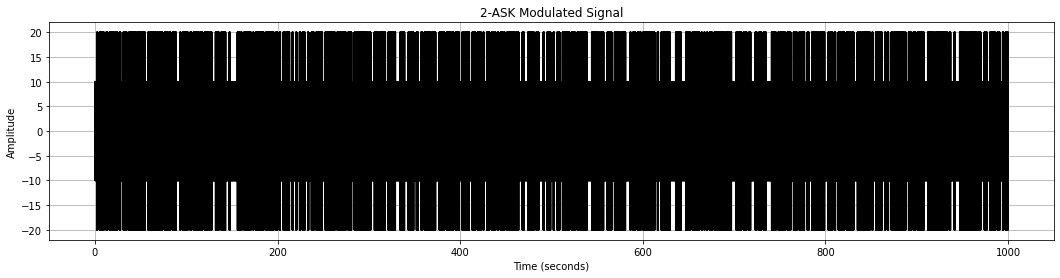

In [138]:
A0 = 10;     # Carrier amplitude for binary input '0'
A1 = 20;     # Carrier amplitude for binary input '1'

t = np.linspace(0, N, int(fs*N), endpoint=False)
modulated_signal = np.zeros(int(fs*N))

for i in range(len(binary_sequence)):
    if binary_sequence[i] == 0:
        modulated_signal[i*fs:(i+1)*fs] = A0*carrier 
    else:
        modulated_signal[i*fs:(i+1)*fs] = A1*carrier
        
# plot modulatied signal
plt.figure(figsize=(18, 4))
plt.plot(t, modulated_signal, '-', color='black', markersize=10)
plt.title("2-ASK Modulated Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


## Demodulation

In [139]:
binary_sequence_recovered = np.zeros(N)
decision_variables = np.zeros(N)
t = np.linspace(0, T, int(fs), endpoint=False) # time axis

In [140]:
# Correlate modulated signal with carrier signal to generate decision variables
for i in range(N):
    correlation = np.trapz(t,modulated_signal[i*fs:(i+1)*fs]*carrier)            #Convolution 
    decision_variables[i]=round((correlation))
threshold = np.mean(decision_variables)             #adaptive threshold
for i in range(N):
    if decision_variables[i] >= threshold:
        binary_sequence_recovered[i] = 1
    else:
        binary_sequence_recovered[i] = 0

# Compare original and recovered binary sequences
print("Original Binary Sequence: ", binary_sequence)
print("Recovered Binary Sequence: ", binary_sequence_recovered)

Original Binary Sequence:  [0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0
 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1
 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0
 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1
 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1
 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0
 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1
 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0
 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 

In [143]:
error_count = np.sum(np.abs(binary_sequence[i] - binary_sequence_recovered[i]) for i in range(N))
error_probability = error_count / N
print('Error probability:', error_probability)

Error probability: 0.0


C:\Users\Admin\AppData\Local\Temp/ipykernel_15480/4134338528.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  error_count = np.sum(np.abs(binary_sequence[i] - binary_sequence_recovered[i]) for i in range(N))


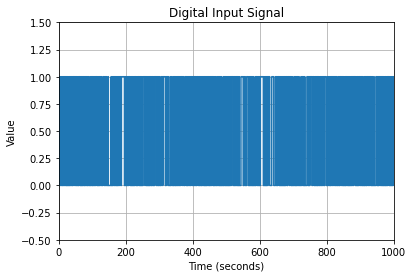

In [144]:
plotBinarySequence(binary_sequence_recovered)

## Implement with noise

In [145]:
import math
N0=10

In [146]:
def generate_gaussian_noise(size):
    return np.random.normal(0, np.sqrt(N0/2), size)

In [147]:
noise = generate_gaussian_noise(N*fs)
#generate Gaussian noise with mean 0, standard deviation sqrt(N0/2), and size = N*fs

In [148]:
receive = modulated_signal + noise

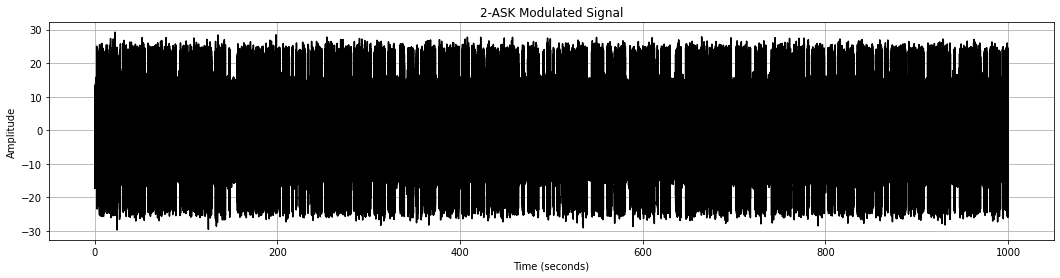

In [150]:
t = np.linspace(0, N, int(fs*N), endpoint=False)
# plot receive signal
plt.figure(figsize=(18, 4))
plt.plot(t, receive, '-', color='black', markersize=10)
plt.title("2-ASK Modulated Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

### Demodulation with noise

In [151]:
binary_sequence_recovered = np.zeros(N)
decision_variables = np.zeros(N)
t = np.linspace(0, T, int(fs), endpoint=False)

In [152]:
# Correlate modulated signal with carrier signal to generate decision variables
for i in range(N):
    correlation = np.trapz(t,receive[i*fs:(i+1)*fs]*carrier)            #Convolution 
    decision_variables[i]=round((correlation)) #threshold
threshold = statistics.mean(decision_variables)
for i in range(N):
    if decision_variables[i] >= threshold:
        binary_sequence_recovered[i] = 1
    else:
        binary_sequence_recovered[i] = 0

# Compare original and recovered binary sequences
print("Original Binary Sequence: ", binary_sequence)
print("Recovered Binary Sequence: ", binary_sequence_recovered)


Original Binary Sequence:  [0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0
 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1
 0 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0
 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0
 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1
 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1
 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0
 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1
 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0
 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 

In [153]:
count =0
# print("Bit error at:")

for i in range(0, N):
    if binary_sequence[i] != binary_sequence_recovered[i]:
#         print(i + 1)
        count+=1
count

138

In [155]:
error_count = np.sum(np.abs(binary_sequence[i] - binary_sequence_recovered[i]) for i in range(N))
error_probability = error_count / N
print('Error probability:', error_probability*100)

Error probability: 13.8


C:\Users\Admin\AppData\Local\Temp/ipykernel_15480/255209800.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  error_count = np.sum(np.abs(binary_sequence[i] - binary_sequence_recovered[i]) for i in range(N))


### Demostration BER

In [158]:
snr_thucte = 10* math.log10(500*T/(4*N0))

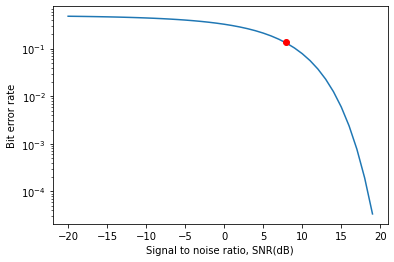

In [161]:
from scipy.special import erfc
snr = np.arange(-20,20,1)
ber = 1/2 * erfc(np.sqrt((10**(snr/10))/10))
plt.semilogy(snr,ber)
plt.plot(snr_thucte,error_probability,'ro')
plt.xlabel("Signal to noise ratio, SNR(dB)")
plt.ylabel("Bit error rate")
plt.show()

### Plot the BER representation in theory and practice with N0 running from 1 to 200

In [127]:
def ber_thucte(N0):
    noise = np.random.normal(0,np.sqrt(N0/2),N*fs)
    receive = modulated_signal+noise
    binary_sequence_recovered = np.zeros(N)
    decision_variables = np.zeros(N)
    t = np.linspace(0, T, int(fs), endpoint=False)
    # Correlate modulated signal with carrier signal to generate decision variables
    for i in range(N):
        correlation = np.trapz(t,receive[i*fs:(i+1)*fs]*carrier)            #Convolution 
        decision_variables[i]=round((correlation)) #threshold
    threshold = statistics.mean(decision_variables)
    for i in range(N):
        if decision_variables[i] >= threshold:
            binary_sequence_recovered[i] = 1
        else:
            binary_sequence_recovered[i] = 0
    error_count = np.sum(np.abs(binary_sequence[i] - binary_sequence_recovered[i]) for i in range(N))
    error_probability = error_count / N
    return error_probability


C:\Users\Admin\AppData\Local\Temp/ipykernel_15480/1018313951.py:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  error_count = np.sum(np.abs(binary_sequence[i] - binary_sequence_recovered[i]) for i in range(N))


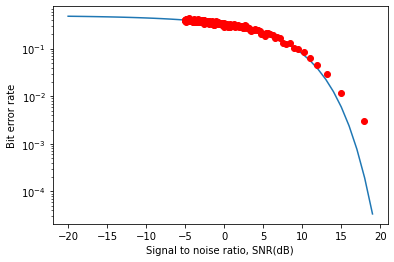

In [164]:
from scipy.special import erfc
snr = np.arange(-20,20,1)
ber = 1/2 * erfc(np.sqrt((10**(snr/10))/10))
plt.semilogy(snr,ber)
for N0 in range(1,200,1):
    snr_thucte = 10* math.log10(250/(4*N0))
    plt.plot(snr_thucte,ber_thucte(N0),'ro')
plt.xlabel("Signal to noise ratio, SNR(dB)")
plt.ylabel("Bit error rate")
plt.show()